In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head(20)

,url,status,is_ip,length_url,length_hostname,tiny_url,countAtSign,countQuestionMark,countHyphen,countDot,...,length_word_raw,avg_row_words,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path
0,http://www.crestonwood.com/router.php,legitimate,0,37,19,0,0,0,0,3,...,4,5.750000,7.0,4.500000,11,11,6,3,3,3
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,23,0,0,0,0,1,...,4,15.750000,19.0,14.666667,32,19,32,2,19,2
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,50,0,0,1,1,4,...,12,8.250000,8.4,8.142857,17,13,17,2,3,2
3,http://rgipt.ac.in,legitimate,0,18,11,0,0,0,0,2,...,1,5.000000,5.0,0.000000,5,5,0,5,5,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,55,15,0,0,0,2,2,...,6,6.333333,5.0,7.000000,11,7,11,3,3,4
5,http://appleid.apple.com-app.es/,phishing,0,32,24,0,0,0,1,3,...,4,4.500000,4.5,0.000000,7,7,0,3,3,0
6,http://www.mutuo.it,legitimate,0,19,12,0,0,0,0,2,...,2,4.000000,4.0,0.000000,5,5,0,3,3,0
7,http://www.shadetreetechnology.com/V4/validati...,phishing,0,81,27,0,0,0,0,2,...,5,13.200000,11.0,14.666667,32,19,32,2,3,2
8,http://vamoaestudiarmedicina.blogspot.com/,legitimate,0,42,34,1,0,0,0,2,...,2,14.500000,14.5,0.000000,21,21,0,8,8,0
9,https://parade.com/425836/joshwigler/the-amazi...,legitimate,0,104,10,0,0,0,10,1,...,14,5.571429,6.0,5.538462,10,6,10,2,6,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  11430 non-null  object 
 1   status               11430 non-null  object 
 2   is_ip                11430 non-null  int64  
 3   length_url           11430 non-null  int64  
 4   length_hostname      11430 non-null  int64  
 5   tiny_url             11430 non-null  int64  
 6   countAtSign          11430 non-null  int64  
 7   countQuestionMark    11430 non-null  int64  
 8   countHyphen          11430 non-null  int64  
 9   countDot             11430 non-null  int64  
 10  countComma           11430 non-null  int64  
 11  countSemicolon       11430 non-null  int64  
 12  countDollar          11430 non-null  int64  
 13  countSlash           11430 non-null  int64  
 14  have_redirect        11430 non-null  int64  
 15  CountEqual           11430 non-null 

In [7]:
data.isnull().sum()

url                    0
status                 0
is_ip                  0
length_url             0
length_hostname        0
tiny_url               0
countAtSign            0
countQuestionMark      0
countHyphen            0
countDot               0
countComma             0
countSemicolon         0
countDollar            0
countSlash             0
have_redirect          0
CountEqual             0
CountPercent           0
CountUnderScore        0
CountDotHostName       0
CountColon             0
CountStar              0
CountHttp              0
checkHttps             0
RatioDigitHost         0
RatioDigitsURL         0
have_prefixOrSuffix    0
dns_record             0
count_redirect         0
page_rank              0
domain_age             0
domainRegLen           0
RatioLinksTag          0
RatioAnchorURL         0
count_www              0
count_com              0
length_word_raw        0
avg_row_words          0
avg_row_words_host     0
avg_row_words_path     0
longest_words_raw      0


In [8]:
count = data.status.value_counts()

In [9]:
count

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [10]:
x = count.index
x

Index(['legitimate', 'phishing'], dtype='object', name='status')

Text(0, 0.5, 'Count')

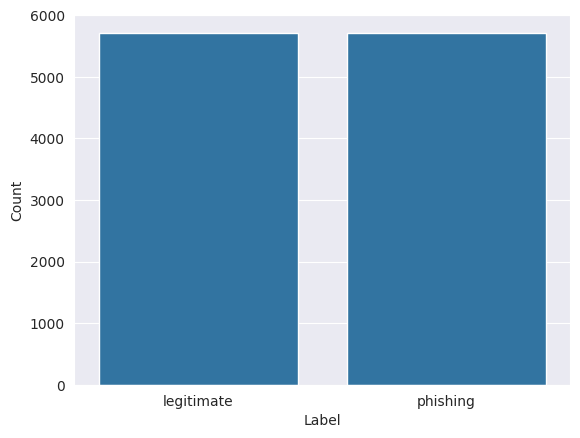

In [11]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Label')
plt.ylabel('Count')

In [12]:
X = data.drop(['url', 'status'], axis=1)
y = data['status']

In [13]:
X

,is_ip,length_url,length_hostname,tiny_url,countAtSign,countQuestionMark,countHyphen,countDot,countComma,countSemicolon,...,length_word_raw,avg_row_words,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path
0,0,37,19,0,0,0,0,3,0,0,...,4,5.750000,7.00,4.500000,11,11,6,3,3,3
1,0,77,23,0,0,0,0,1,0,0,...,4,15.750000,19.00,14.666667,32,19,32,2,19,2
2,0,126,50,0,0,1,1,4,0,0,...,12,8.250000,8.40,8.142857,17,13,17,2,3,2
3,0,18,11,0,0,0,0,2,0,0,...,1,5.000000,5.00,0.000000,5,5,0,5,5,0
4,0,55,15,0,0,0,2,2,0,0,...,6,6.333333,5.00,7.000000,11,7,11,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,45,17,0,0,0,0,2,0,0,...,4,7.750000,6.00,9.500000,11,9,11,3,3,8
11426,0,84,18,0,1,1,0,5,0,0,...,12,5.166667,6.50,4.900000,10,10,8,3,3,3
11427,0,105,16,0,0,1,6,2,0,0,...,13,6.153846,5.50,6.272727,15,8,15,1,3,1
11428,0,38,30,0,0,0,0,2,0,0,...,2,12.500000,12.50,0.000000,22,22,0,3,3,0


In [14]:
y

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
y

array([0, 1, 1, ..., 0, 0, 1])

#Train model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [19]:
X_train

,is_ip,length_url,length_hostname,tiny_url,countAtSign,countQuestionMark,countHyphen,countDot,countComma,countSemicolon,...,length_word_raw,avg_row_words,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path
6802,0,27,14,0,0,0,0,2,0,0,...,3,4.333333,4.5,4.000000,6,6,4,3,3,4
4794,0,44,23,0,0,0,0,2,0,0,...,4,7.500000,9.5,5.500000,12,12,7,4,7,4
6363,0,24,15,0,0,0,0,2,0,0,...,2,5.000000,5.0,0.000000,7,7,0,3,3,0
7566,0,53,14,0,0,0,3,2,0,0,...,6,5.833333,4.5,6.500000,10,6,10,3,3,4
7828,0,50,22,0,0,0,0,3,0,0,...,6,5.666667,8.5,4.250000,11,11,7,3,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,0,28,19,0,0,0,0,2,0,0,...,2,7.000000,7.0,0.000000,11,11,0,3,3,0
5200,0,48,35,0,0,1,3,2,0,0,...,7,4.285714,5.6,1.000000,8,8,1,1,3,1
4066,0,26,18,0,0,0,0,2,0,0,...,2,6.500000,6.5,0.000000,10,10,0,3,3,0
931,0,55,30,0,0,0,1,3,0,0,...,5,7.800000,8.0,7.500000,13,13,13,2,5,2


In [20]:
y_train

array([0, 1, 0, ..., 0, 1, 1])

#Store result

In [21]:
model_list = []
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

def set_result(model, acc, f1, recall, precision):
  model_list.append(model)
  accuracy_list.append(round(acc,3))
  f1_score_list.append(round(f1,3))
  recall_list.append(round(recall,3))
  precision_list.append(round(precision,3))

#Random Forest

In [22]:
randomForest = RandomForestClassifier()
model_rf = randomForest.fit(X_train, y_train)

In [23]:
rf_predict = model_rf.predict(X_test)

In [24]:
pd.DataFrame({'y_test': y_test, 'predict': rf_predict})

,y_test,predict
0,1,1
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
2281,1,1
2282,1,1
2283,0,0
2284,1,0


In [25]:
acc_score_rf = accuracy_score(rf_predict, y_test)
f1_score_rf = f1_score(rf_predict, y_test)
recall_score_rf = recall_score(rf_predict, y_test)
precision_score_rf = precision_score(rf_predict, y_test)

In [26]:
print(classification_report(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1095
           1       0.95      0.96      0.95      1191

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286


In [27]:
set_result('RF', acc_score_rf, f1_score_rf, recall_score_rf, precision_score_rf)

#DescisionTree

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt_model = dt.fit(X_train, y_train)

In [30]:
dt_predict = dt_model.predict(X_test)

In [31]:
pd.DataFrame({'y_test': y_test, 'predict': dt_predict})

,y_test,predict
0,1,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
2281,1,1
2282,1,1
2283,0,0
2284,1,0


In [32]:
accuracy_score(dt_predict, y_test)

0.9216972878390202

In [33]:
print(classification_report(dt_predict, y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1118
           1       0.91      0.93      0.92      1168

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286


In [34]:
acc_score_dt = accuracy_score(dt_predict, y_test)
f1_score_dt = f1_score(dt_predict, y_test)
recall_score_dt = recall_score(dt_predict, y_test)
precision_score_dt = precision_score(dt_predict, y_test)

set_result('DT', acc_score_dt, f1_score_dt,
           recall_score_dt, precision_score_dt)

#Logistic Regression

In [35]:
logistic = LogisticRegression()
lg_model = logistic.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
lg_predic = lg_model.predict(X_test)

In [37]:
accuracy_score(lg_predic, y_test)

0.8814523184601925

In [38]:
print(classification_report(dt_predict, y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1118
           1       0.91      0.93      0.92      1168

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286


In [39]:
acc_score_lg = accuracy_score(lg_predic, y_test)
f1_score_lg = f1_score(lg_predic, y_test)
recall_score_lg = recall_score(lg_predic, y_test)
precision_score_lg = precision_score(lg_predic, y_test)

set_result('LGR', acc_score_lg, f1_score_lg,
           recall_score_lg, precision_score_lg)

#KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(X_train, y_train)

In [41]:
knn_predict = knn_model.predict(X_test)

In [42]:
accuracy_score(knn_predict, y_test)

0.8237095363079615

In [43]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1212
           1       0.78      0.87      0.82      1074

    accuracy                           0.82      2286
   macro avg       0.83      0.83      0.82      2286
weighted avg       0.83      0.82      0.82      2286


In [44]:
acc_score_knn = accuracy_score(knn_predict, y_test)
f1_score_knn = f1_score(knn_predict, y_test)
recall_score_knn = recall_score(knn_predict, y_test)
precision_score_knn = precision_score(knn_predict, y_test)

set_result('KNN', acc_score_knn, f1_score_knn,
           recall_score_knn, precision_score_knn)

#Support vector machine

In [45]:
svc = SVC()
svc_model = svc.fit(X_train, y_train)

In [46]:
svm_predict = svc_model.predict(X_test)

In [47]:
accuracy_score(svm_predict, y_test)

0.7248468941382327

In [48]:
print(classification_report(svm_predict, y_test))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1086
           1       0.74      0.74      0.74      1200

    accuracy                           0.72      2286
   macro avg       0.72      0.72      0.72      2286
weighted avg       0.72      0.72      0.72      2286


In [49]:
acc_score_svm = accuracy_score(svm_predict, y_test)
f1_score_svm = f1_score(svm_predict, y_test)
recall_score_svm = recall_score(svm_predict, y_test)
precision_score_svm = precision_score(svm_predict, y_test)

set_result('SVM', acc_score_svm, f1_score_svm,
           recall_score_svm, precision_score_svm)

#Naive Bayes

In [50]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [51]:
nb_predict = nb_model.predict(X_test)

In [52]:
accuracy_score(nb_predict, y_test)

0.7300962379702537

In [53]:
print(classification_report(nb_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77      1636
           1       0.51      0.94      0.67       650

    accuracy                           0.73      2286
   macro avg       0.74      0.79      0.72      2286
weighted avg       0.84      0.73      0.74      2286


In [54]:
acc_score_nb = accuracy_score(nb_predict, y_test)
f1_score_nb = f1_score(nb_predict, y_test)
recall_score_nb = recall_score(nb_predict, y_test)
precision_score_nb = precision_score(nb_predict, y_test)

set_result('NB', acc_score_nb, f1_score_nb,
           recall_score_nb, precision_score_nb)

#Multi-layer perceptron classifier

In [55]:
mlp = MLPClassifier()
mlp_model = mlp.fit(X_train, y_train)

In [56]:
mlp_predict = mlp_model.predict(X_test)

In [57]:
accuracy_score(mlp_predict, y_test)

0.926509186351706

In [58]:
print(classification_report(mlp_predict, y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1085
           1       0.93      0.93      0.93      1201

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286


In [59]:
acc_score_mlp = accuracy_score(mlp_predict, y_test)
f1_score_mlp = f1_score(mlp_predict, y_test)
recall_score_mlp = recall_score(mlp_predict, y_test)
precision_score_mlp = precision_score(mlp_predict, y_test)

set_result('MLP', acc_score_mlp, f1_score_mlp,
           recall_score_mlp, precision_score_mlp)

#Compare models


In [60]:
result = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'F1_Score': f1_score_list,
    'Recall': recall_list,
    'Precision': precision_list
})

In [61]:
result = result.sort_values(by=['Accuracy', 'F1_Score'], ascending=False).reset_index(drop=True)

In [62]:
result

,Model,Accuracy,F1_Score,Recall,Precision
0,RF,0.952,0.954,0.955,0.952
1,MLP,0.927,0.930,0.928,0.932
2,DT,0.922,0.924,0.935,0.914
3,LGR,0.881,0.883,0.911,0.857
4,KNN,0.824,0.822,0.869,0.781
5,NB,0.730,0.666,0.945,0.514
6,SVM,0.725,0.737,0.736,0.739


Text(0, 0.5, 'Accuracy')

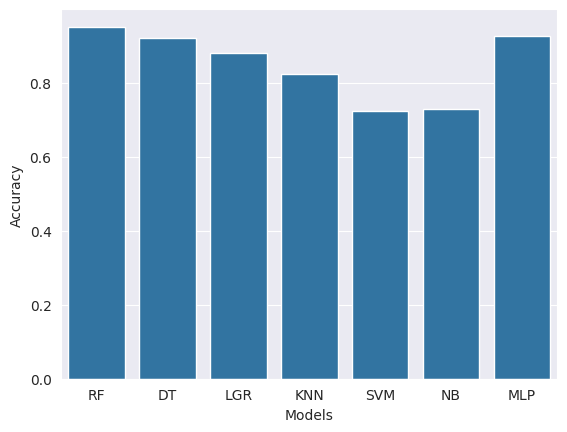

In [63]:
sns.barplot(x=model_list, y=accuracy_list)
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'F1_Score')

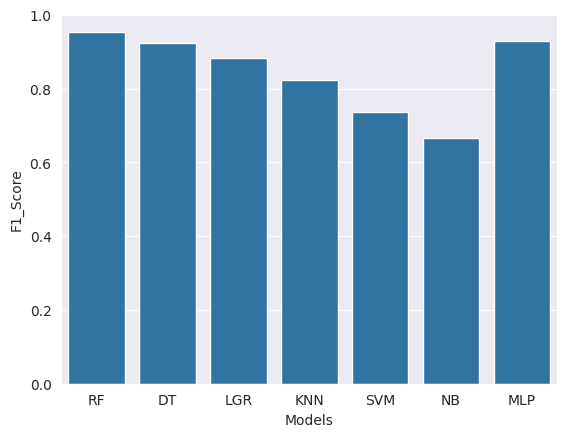

In [64]:
sns.barplot(x=model_list, y=f1_score_list)
plt.xlabel('Models')
plt.ylabel('F1_Score')

Text(0, 0.5, 'Recall')

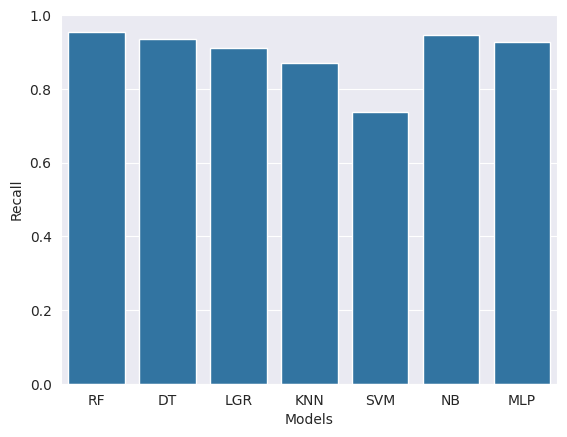

In [65]:
sns.barplot(x=model_list, y=recall_list)
plt.xlabel('Models')
plt.ylabel('Recall')

Text(0, 0.5, 'Precision')

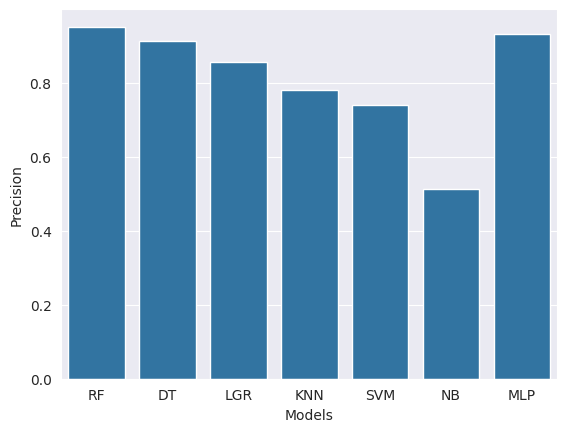

In [66]:
sns.barplot(x=model_list, y=precision_list)
plt.xlabel('Models')
plt.ylabel('Precision')

#Choose best model

In [67]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

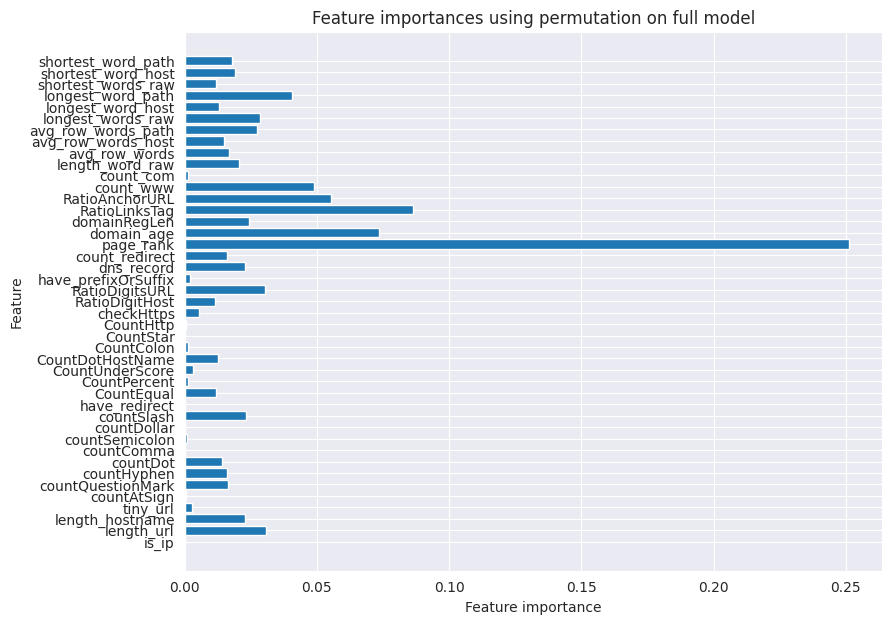

In [68]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rf_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#Test

In [69]:
!pip install requests
!pip install python-whois

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [71]:
import features as fe
import whois
import requests
import re
from urllib.parse import urlparse
from datetime import datetime

In [72]:
def create_vector(url):
  key = "wgowgcc4s4os0os8skw4wckw88s8wwkccwcsgcgg"
  flag = 1
  features = []
  try:
    response = requests.get(url)
  except:
    response = ""

  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    flag = 0
  features.append(fe.is_ip(url)),
  features.append(fe.length_url(url)),
  features.append(fe.length_hostname(url)),
  features.append(fe.tiny_url(url)),
  features.append(fe.countAtSign(url)),
  features.append(fe.countQuestionMark(url)),
  features.append(fe.countHyphen(url)),
  features.append(fe.countDot(url)),
  features.append(fe.countComma(url)),
  features.append(fe.countSemicolon(url)),
  features.append(fe.countDollar(url)),
  features.append(fe.countSlash(url)),
  features.append(fe.have_redirect(url)),
  features.append(fe.CountEqual(url)),
  features.append(fe.CountPercent(url)),
  features.append(fe.CountUnderScore(url)),
  features.append(fe.CountDotHostName(url)),
  features.append(fe.CountColon(url)),
  features.append(fe.CountStar(url)),
  features.append(fe.CountHttp(url)),
  features.append(fe.check_https_protocol(url)),
  features.append(fe.RatioDigitsInHostname(url)),
  features.append(fe.RatioDigitsURL(url)),
  features.append(fe.have_prefixOrSuffix(url)),
  features.append(fe.dns_expiration_length(url)),
  features.append(fe.web_forwarding(response)),
  features.append(fe.page_rank(key,url)),

  features.append(0 if flag==0 else fe.DomainAge(domain_name))
  features.append(0 if flag==0 else fe.DomainRegLen(domain_name))
  features.append(fe.LinksInScriptTags(response,url))
  features.append(fe.AnchorURL(response,url))


  features.append(fe.count_www(url)),
  features.append(fe.count_com(url)),
  features.append(fe.length_word_raw(url)),

  features.append(fe.average_word_length(fe.raw_words(url))),
  features.append(fe.average_word_length(fe.raw_words_host(url))),
  features.append(fe.average_word_length(fe.raw_words_path(url))),

  features.append(fe.longest_word_length(fe.raw_words(url))),
  features.append(fe.longest_word_length(fe.raw_words_host(url))),
  features.append(fe.longest_word_length(fe.raw_words_path(url))),

  features.append(fe.shortest_word_length(fe.raw_words(url))),
  features.append(fe.shortest_word_length(fe.raw_words_host(url))),
  features.append(fe.shortest_word_length(fe.raw_words_path(url))),

  return features


In [73]:
columns =[
   'is_ip',
  'length_url',
  'length_hostname',
  'tiny_url',
  'countAtSign',
  'countQuestionMark',
  'countHyphen',
  'countDot',
  'countComma',
  'countSemicolon',
  'countDollar',
  'countSlash',
  'have_redirect',
  'CountEqual',
  'CountPercent',
  'CountUnderScore',
  'CountDotHostName',
  'CountColon',
  'CountStar',
  'CountHttp',
  'checkHttps',
  'RatioDigitHost',
  'RatioDigitsURL',
  'have_prefixOrSuffix',
  'dns_record',
  'count_redirect',
  'page_rank',
  'domain_age',
  'domainRegLen',
  'RatioLinksTag',
  'RatioAnchorURL',

  'count_www',
  'count_com',
  'length_word_raw',
  'avg_row_words',
  'avg_row_words_host',
  'avg_row_words_path',
  'longest_words_raw',
  'longest_word_host',
  'longest_word_path',
  'shortest_words_raw',
  'shortest_word_host',
  'shortest_word_path',
]

In [74]:
url = ['https://www.google.com/', 'http://205.174.165.80/CICDataset/ISCX-URL-2016/',
       'https://kotaku.com/the-witcher-3-wild-hunt-the-kotaku-review-1703766283',
       'http://docs.python.org:80/3/library/urllib.parse.html?',

       	'https://usps.address-shipwatchers.shop/',
       'https://grtakeprize.com/it/bp4f/index?c=2277&affId=BC6DC089&c1=48&c2=1opCaODZewbK&c3=1c1e607843434706847313349c7444a0&c4=&c7=&c5=&c8=&c6=&i1=&t1=',
       'https://t.ly/EWZo9','http://fis-lab.com/wp-includes/images/smilies/front/wwpp/',

       'https://www.kaggle.com/busrabetulcavusoglu/']

In [75]:
import re
from urllib.parse import urlparse
import urllib
from datetime import datetime, date
import time
import requests

In [76]:
url_list = []
for i in url:
  url_list.append(create_vector(i))

In [77]:
df = pd.DataFrame(url_list, columns= columns)

In [78]:
df

,is_ip,length_url,length_hostname,tiny_url,countAtSign,countQuestionMark,countHyphen,countDot,countComma,countSemicolon,...,length_word_raw,avg_row_words,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path
0,0,23,14,0,0,0,0,2,0,0,...,2,4.500000,4.500000,0.000000,6,6,0,3,3,0
1,1,47,14,0,0,0,2,3,0,0,...,12,3.583333,2.750000,4.000000,10,3,10,2,2,2
2,0,71,10,0,0,0,8,1,0,0,...,10,5.000000,6.000000,4.888889,10,6,10,1,6,1
3,0,54,15,0,0,1,0,4,0,0,...,7,4.714286,5.000000,4.600000,7,6,7,1,4,1
4,0,39,30,0,0,0,1,2,0,0,...,3,7.666667,7.666667,0.000000,12,12,0,4,4,0
5,0,145,15,0,0,1,0,1,0,0,...,21,5.047619,11.000000,4.750000,32,11,32,1,11,1
6,0,18,4,0,0,0,0,1,0,0,...,2,3.000000,1.000000,5.000000,5,1,5,1,1,5
7,0,57,11,0,0,0,2,1,0,0,...,8,4.750000,3.000000,5.333333,8,3,8,2,3,2
8,0,43,14,0,0,0,0,2,0,0,...,3,9.333333,4.500000,19.000000,19,6,19,3,3,19


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_ip                9 non-null      int64  
 1   length_url           9 non-null      int64  
 2   length_hostname      9 non-null      int64  
 3   tiny_url             9 non-null      int64  
 4   countAtSign          9 non-null      int64  
 5   countQuestionMark    9 non-null      int64  
 6   countHyphen          9 non-null      int64  
 7   countDot             9 non-null      int64  
 8   countComma           9 non-null      int64  
 9   countSemicolon       9 non-null      int64  
 10  countDollar          9 non-null      int64  
 11  countSlash           9 non-null      int64  
 12  have_redirect        9 non-null      int64  
 13  CountEqual           9 non-null      int64  
 14  CountPercent         9 non-null      int64  
 15  CountUnderScore      9 non-null      int64  

In [80]:
df.isna().sum()

is_ip                  0
length_url             0
length_hostname        0
tiny_url               0
countAtSign            0
countQuestionMark      0
countHyphen            0
countDot               0
countComma             0
countSemicolon         0
countDollar            0
countSlash             0
have_redirect          0
CountEqual             0
CountPercent           0
CountUnderScore        0
CountDotHostName       0
CountColon             0
CountStar              0
CountHttp              0
checkHttps             0
RatioDigitHost         0
RatioDigitsURL         0
have_prefixOrSuffix    0
dns_record             0
count_redirect         0
page_rank              0
domain_age             0
domainRegLen           0
RatioLinksTag          0
RatioAnchorURL         0
count_www              0
count_com              0
length_word_raw        0
avg_row_words          0
avg_row_words_host     0
avg_row_words_path     0
longest_words_raw      0
longest_word_host      0
longest_word_path      0


#Fill missing value


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
x_arr = X.values

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(x_arr[:, 25:26])

SimpleImputer()

In [ ]:
df_values = df.values

In [ ]:
df_values[:, 25:26] = imputer.transform(df_values[:, 25:26])

In [ ]:
df_values

array([[0.00000000e+00, 2.30000000e+01, 1.40000000e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+01, 1.00000000e+00,
        9.62700000e+03, 1.69400000e+03],
       [0.00000000e+00, 4.70000000e+01, 1.40000000e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.85714286e-01, 3.19148936e-01, 0.00000000e+00,
        0.00000000e+00,

#Predict

In [81]:
rf_predict = rf_model.predict(df)

In [82]:
result = rf_predict.tolist()

In [83]:
result

[0, 1, 0, 1, 1, 1, 1, 1, 0]

In [84]:
combine = {'url': url, 'predict': result}

In [85]:
df_predict = pd.DataFrame(combine)

In [86]:
df_predict

,url,predict
0,https://www.google.com/,0
1,http://205.174.165.80/CICDataset/ISCX-URL-2016/,1
2,https://kotaku.com/the-witcher-3-wild-hunt-the...,0
3,http://docs.python.org:80/3/library/urllib.par...,1
4,https://usps.address-shipwatchers.shop/,1
5,https://grtakeprize.com/it/bp4f/index?c=2277&a...,1
6,https://t.ly/EWZo9,1
7,http://fis-lab.com/wp-includes/images/smilies/...,1
8,https://www.kaggle.com/busrabetulcavusoglu/,0
